##  DataPrep2_InputOutput_regressions
1. Group center respondent answers (19)


2. Add State code to check for location


3. Factor Analysis on 41 Ys and get Happiness index


-GRID Search

4. Run Lasso and select Features. 


5. Run Linear Regression with 10 features. 


6. Interact state and 19 features


7. Run Multilevel


8. Run unpooled regression



In [1]:
# LOAD PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr
import plotly.express as px
from factor_analyzer import FactorAnalyzer
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

In [2]:
# setting working Directory
os.chdir("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data")
current_path = os.getcwd()
print(current_path)

/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data


In [3]:
## Load All data
x_19=pd.read_csv('x_19_dataprep2.csv')
x_demog=pd.read_csv('x_demog_dataprep2.csv')
x_19_demog2=pd.read_csv('x_19_demog2_dataprep2.csv')
datas2=pd.read_csv('datas_dataprep2.csv')
data_all3=pd.read_csv('data_all3__dataprep2.csv')
selected_features=pd.read_csv("selected_feat.csv")

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,69,76,81,83,86,150) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## CREATE INTERACTION VARIABLE FOR STATE AND 5 top features

In [4]:
x_interaction=x_19_demog2.iloc[:, 0:19]
x_temp=x_19_demog2.iloc[:, 30:39]
x_int_state=pd.concat([x_interaction, x_temp], axis=1)

In [5]:
x_interaction

,ti_6,ti_7,ti_9,ti_13,ti_14,ti_15,ti_18,ti_19,ti_20,ti_21,ti_22,ti_24,ti_31,ti_34,ti_39,ti_43,ti_46,ti_47,ti_54
0,0.237072,2.284805e-01,3.359489e-01,3.508699e-01,0.241501,0.338362,0.110809,0.234814,0.392348,0.426000,0.398121,0.444163,2.267971e-01,0.562311,4.840620e-01,2.399291e-01,3.642617e-01,2.227998e-01,4.758723e-01
1,-0.853460,3.544286e-18,-3.226093e-18,1.555097e-18,-0.869404,-0.812069,-0.797824,-0.845332,-1.883271,-0.766800,-1.433237,-1.598986,2.512980e-18,-0.809728,1.877243e-18,1.807770e-17,1.614452e-18,1.234345e-18,2.109123e-18
2,0.213365,2.056325e-01,2.015694e-01,2.105219e-01,0.326027,0.304526,0.398912,0.211333,0.353113,0.287550,0.358309,0.199873,2.041174e-01,0.303648,5.445697e-01,2.159361e-01,5.463925e-01,3.007798e-01,6.424276e-01
3,-2.000297,-1.028162e+00,-2.141674e+00,-1.578914e+00,-1.494289,-0.634429,-0.623300,-1.188748,-1.471306,-1.677376,-1.343659,-2.248574,-1.020587e+00,-1.265199,-6.807121e-01,-6.748005e-01,-4.097944e-01,-5.012996e-01,-5.353563e-01
4,-0.355608,5.140812e-01,3.359489e-01,3.508699e-01,-0.724504,-3.891163,-0.332427,0.176111,0.588522,-0.159750,0.298591,-0.166561,3.401957e-01,0.337386,3.630465e-01,3.598936e-01,1.821308e-01,1.670999e-01,3.569042e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,-1.092845,-2.858793e+00,-2.826887e+00,-3.209175e+00,-1.219287,-2.673885,-2.651305,-1.932923,-1.808629,-2.291050,-1.944483,-2.291230,-2.787945e+00,-2.616802,5.047232e-01,-3.265376e+00,-3.438275e+00,-2.787715e+00,-2.141425e+00
28853,-0.207438,-1.142403e-01,-1.119830e+00,-2.339132e-01,-0.211314,-1.127873,-1.939155,-1.291479,-0.490435,-3.008626,-0.721595,-0.166561,-1.020587e+00,-0.984044,7.260930e-01,6.598049e-01,7.892336e-01,-1.197549e+00,-1.368133e+00
28854,0.492381,-4.745365e-01,3.876334e-01,1.619399e-01,0.501580,-0.390418,0.536997,0.487691,0.271626,0.737308,0.620150,0.614995,-2.355201e-01,0.700726,5.026797e-01,6.644189e-01,4.203019e-01,4.627381e-01,5.765376e-01
28855,0.762018,1.028162e+00,1.151825e+00,1.202982e+00,1.086756,1.160098,0.997280,1.056665,1.345194,0.958500,0.895773,1.284900,1.312183e+00,0.867565,7.779567e-01,1.079681e+00,1.092785e+00,1.289056e+00,1.223672e+00


In [6]:
just_demog=x_19_demog2[['Female_m', 'Age_m', 'tenure_logged',
       'tenure_logged_ths', 'CurrentPay_m', 'Race_m', 'status_D', 'status_L',
       'status_P', 'status_T', 'ws_P']]

In [7]:
x_int_state

,ti_6,ti_7,ti_9,ti_13,ti_14,ti_15,ti_18,ti_19,ti_20,ti_21,...,ti_54,state_IL,state_IN,state_KY,state_MA,state_MI,state_NM,state_OH,state_PA,state_TN
0,0.237072,2.284805e-01,3.359489e-01,3.508699e-01,0.241501,0.338362,0.110809,0.234814,0.392348,0.426000,...,4.758723e-01,0,0,1,0,0,0,0,0,0
1,-0.853460,3.544286e-18,-3.226093e-18,1.555097e-18,-0.869404,-0.812069,-0.797824,-0.845332,-1.883271,-0.766800,...,2.109123e-18,0,0,1,0,0,0,0,0,0
2,0.213365,2.056325e-01,2.015694e-01,2.105219e-01,0.326027,0.304526,0.398912,0.211333,0.353113,0.287550,...,6.424276e-01,0,0,1,0,0,0,0,0,0
3,-2.000297,-1.028162e+00,-2.141674e+00,-1.578914e+00,-1.494289,-0.634429,-0.623300,-1.188748,-1.471306,-1.677376,...,-5.353563e-01,0,0,1,0,0,0,0,0,0
4,-0.355608,5.140812e-01,3.359489e-01,3.508699e-01,-0.724504,-3.891163,-0.332427,0.176111,0.588522,-0.159750,...,3.569042e-01,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,-1.092845,-2.858793e+00,-2.826887e+00,-3.209175e+00,-1.219287,-2.673885,-2.651305,-1.932923,-1.808629,-2.291050,...,-2.141425e+00,0,0,0,0,1,0,0,0,0
28853,-0.207438,-1.142403e-01,-1.119830e+00,-2.339132e-01,-0.211314,-1.127873,-1.939155,-1.291479,-0.490435,-3.008626,...,-1.368133e+00,0,1,0,0,0,0,0,0,0
28854,0.492381,-4.745365e-01,3.876334e-01,1.619399e-01,0.501580,-0.390418,0.536997,0.487691,0.271626,0.737308,...,5.765376e-01,0,1,0,0,0,0,0,0,0
28855,0.762018,1.028162e+00,1.151825e+00,1.202982e+00,1.086756,1.160098,0.997280,1.056665,1.345194,0.958500,...,1.223672e+00,0,0,0,0,0,0,1,0,0


In [8]:
ti_54=x_int_state.iloc[:, 19:28].multiply(x_int_state.iloc[:, 18], axis="index").add_suffix('_ti_54')

ti_47=x_int_state.iloc[:, 19:28].multiply(x_int_state.iloc[:, 17], axis="index").add_suffix('_ti_47')
ti_46=x_int_state.iloc[:, 19:28].multiply(x_int_state.iloc[:, 16], axis="index").add_suffix('_ti_46')
ti_43=x_int_state.iloc[:, 19:28].multiply(x_int_state.iloc[:, 15], axis="index").add_suffix('_ti_43')
ti_22=x_int_state.iloc[:, 19:28].multiply(x_int_state.iloc[:, 10], axis="index").add_suffix('_ti_22')
ti_intr=pd.concat([ti_22, ti_43, ti_46, ti_47, ti_54], axis=1)    

In [9]:
ti_intr

,state_IL_ti_22,state_IN_ti_22,state_KY_ti_22,state_MA_ti_22,state_MI_ti_22,state_NM_ti_22,state_OH_ti_22,state_PA_ti_22,state_TN_ti_22,state_IL_ti_43,...,state_TN_ti_47,state_IL_ti_54,state_IN_ti_54,state_KY_ti_54,state_MA_ti_54,state_MI_ti_54,state_NM_ti_54,state_OH_ti_54,state_PA_ti_54,state_TN_ti_54
0,0.0,0.000000,0.398121,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,4.758723e-01,0.0,0.000000,0.0,0.000000,0.0,0.0
1,-0.0,-0.000000,-1.433237,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,0.0,...,0.0,0.0,0.000000,2.109123e-18,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.358309,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,6.424276e-01,0.0,0.000000,0.0,0.000000,0.0,0.0
3,-0.0,-0.000000,-1.343659,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.000000,-5.353563e-01,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0
4,0.0,0.000000,0.298591,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,3.569042e-01,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,-0.0,-0.000000,-0.000000,-0.0,-1.944483,-0.0,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.000000,-0.000000e+00,-0.0,-2.141425,-0.0,-0.000000,-0.0,-0.0
28853,-0.0,-0.721595,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,0.0,...,-0.0,-0.0,-1.368133,-0.000000e+00,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0
28854,0.0,0.620150,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.576538,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0
28855,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.895773,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,1.223672,0.0,0.0


In [10]:

x_int_state=x_int_state.drop(['ti_6', 'ti_7', 'ti_9', 'ti_13', 'ti_14', 'ti_15', 
                             'ti_18', 'ti_19', 'ti_20', 'ti_21', 'ti_24', 'ti_31', 
                             'ti_34', 'ti_39'], axis=1)
x_int_state=pd.concat([x_int_state, ti_intr], axis=1)

In [11]:
## Ad demog to interactions
x_int_demog=pd.concat([just_demog, x_int_state], axis=1)

## RUN LASSO FOR FEATURE SELECTION

In [13]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
list(x_int_demog.columns)

In [103]:
x_int_demog.shape

(28857, 70)

## RUN REGRESSION WITH TOP FEATURES

In [14]:
#Choose top 10 features.

#all features.
y=data_all3['happiness_y']

x_linear = x_int_demog
y_linear = y

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_r_squared_train = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split Test and Train set 0.25 %
    Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(x_linear, y_linear, test_size=0.25)
    
    linear_reg = linear_model.LinearRegression()
    
    model = linear_reg.fit(Xl_train,Yl_train)
    
    Ypredl_train = linear_reg.predict(Xl_train)
    Ypredl = linear_reg.predict(Xl_test)
    
    linear_r_squared_train[trialNo] = r2_score(Yl_train, Ypredl_train)
    linear_r_squared[trialNo] = r2_score(Yl_test, Ypredl)
    linear_coef[trialNo,:] = linear_reg.coef_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


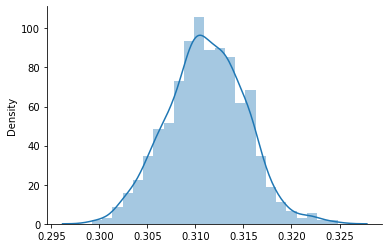

In [102]:
#Distribution of R-squared
r2_df=pd.DataFrame(data=linear_r_squared)
r2_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

r2_df_train=pd.DataFrame(data=linear_r_squared_train)
r2_df_train.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

sb.distplot(r2_df_train)
sb.despine()
#sb.distplot(r2_df)
#sb.despine()

In [ ]:
r2_df.mean()

### PLOT PREDICTION AGAINS ACTUAL VALUES

Text(0, 0.5, 'Observed Values')

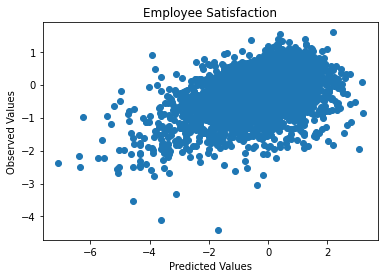

In [16]:
plt.scatter(Yl_test, Ypredl)
plt.title("Employee Satisfaction")

plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")

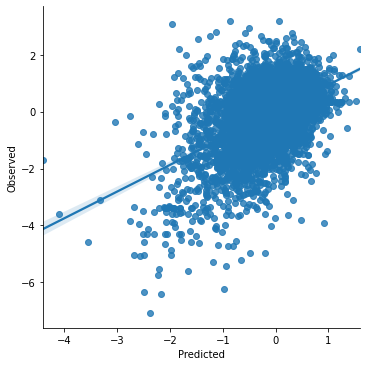

In [17]:

plot_pred = pd.DataFrame({'Observed': Yl_test, 'Predicted': Ypredl})
sb.lmplot(x='Predicted', y='Observed', data=plot_pred)


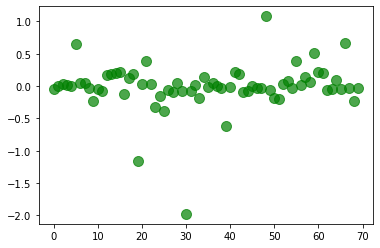

In [18]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='green') 

In [19]:
mean_linear_coef.sort_values(ascending=False)

48    1.079201
66    0.662099
5     0.650203
59    0.506784
55    0.382882
        ...   
23   -0.327600
25   -0.380921
39   -0.621640
19   -1.150731
30   -1.976111
Length: 70, dtype: float64

In [27]:
abs_mean_coef=abs(mean_linear_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef


30    1.976111
19    1.150731
48    1.079201
66    0.662099
5     0.650203
        ...   
35    0.011758
45    0.003733
1     0.002970
37    0.002714
4     0.002209
Length: 70, dtype: float64

In [30]:
linear_coef_df.iloc[:,30]

0     -4.863026
1     -0.482982
2     -0.255526
3      0.040454
4     -2.215752
         ...   
995   -4.862965
996   -4.873755
997    0.030920
998   -1.150765
999   -0.168410
Name: 30, Length: 1000, dtype: float64

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


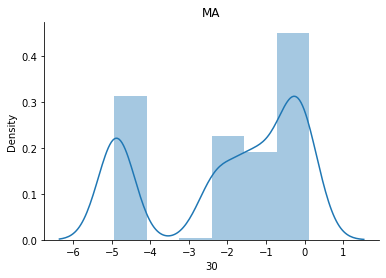

In [29]:
#Distribution of coefficients for the top feature (STATe.)
sb.distplot(linear_coef_df.iloc[:,30]).set_title('MA')
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


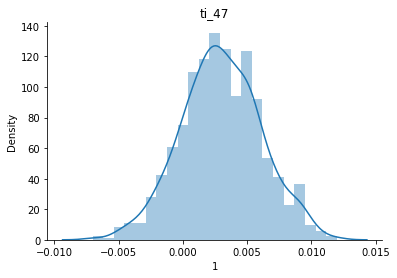

In [23]:
#Distribution of coefficients for the top feature (Management shows a sincere interest in me as a person, not just an employee..)
sb.distplot(linear_coef_df.iloc[:,19]).set_title('ti_47')  
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


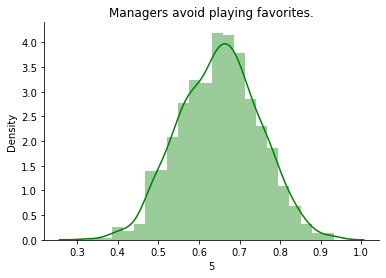

In [24]:
sb.distplot(linear_coef_df.iloc[:,48], color="g").set_title('.')
sb.despine()


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


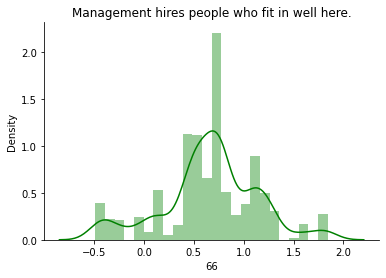

In [28]:
sb.distplot(linear_coef_df.iloc[:,66], color="g").set_title('.')
sb.despine()

In [ ]:
sb.distplot(linear_coef_df.iloc[:,7], color="g").set_title('.')
sb.despine()

In [ ]:
#Management hires people who fit in well here. 54
#Management is competent at running the business. 43

In [ ]:
coef

In [ ]:
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple', 'red', 'green']
coef= mean_linear_coef
coef=coef.sort_values(ascending=False)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh", color=my_colors)
plt.title("Feature Importance")

In [ ]:
coef

## RANDOM FOREST

Feature: 0, Score: 0.00499
Feature: 1, Score: 0.03611
Feature: 2, Score: 0.03743
Feature: 3, Score: 0.04312
Feature: 4, Score: 0.04887
Feature: 5, Score: 0.00613
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00154
Feature: 8, Score: 0.00028
Feature: 9, Score: 0.00432
Feature: 10, Score: 0.00095
Feature: 11, Score: 0.05612
Feature: 12, Score: 0.10231
Feature: 13, Score: 0.07310
Feature: 14, Score: 0.24707
Feature: 15, Score: 0.09564
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00061
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00128
Feature: 20, Score: 0.00073
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00072
Feature: 23, Score: 0.00033
Feature: 24, Score: 0.00010
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.02251
Feature: 27, Score: 0.00705
Feature: 28, Score: 0.00070
Feature: 29, Score: 0.00855
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.01046
Feature: 32, Score: 0.00033
Feature: 33, Score: 0.00037
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01811
Fe

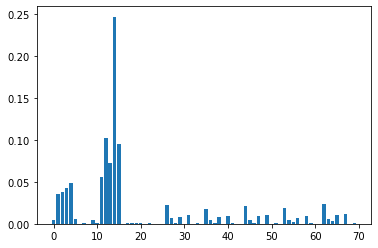

0.27812554405261725

In [31]:
x_linear = x_int_demog
y_linear = y

## RUN RANDOM FOREST

# decision tree for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_linear, y_linear, test_size = 0.2, random_state = 0)


# define the model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)


# fit the model
regressor.fit(X_train, y_train)

# get importance
importance = regressor.feature_importances_

#summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X=x_linear
Y=y_linear
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            happiness_y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     187.8
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:49:38   Log-Likelihood:                -35584.
No. Observations:               28857   AIC:                         7.131e+04
Df Residuals:                   28787   BIC:                         7.189e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1212      0.02

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/statsmodels/graphics/regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
<ipython-input-34-898b70c72355>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=1.0)


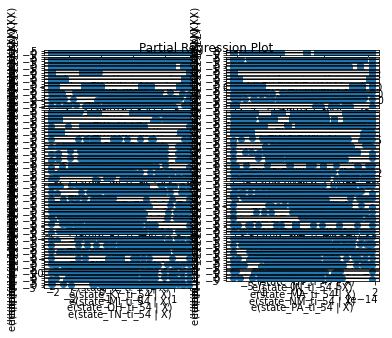

In [34]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [39]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [43]:
model_df=results_summary_to_dataframe(model)
model_df

,coeff,pvals,conf_lower,conf_higher
const,-0.121215,1.724862e-06,-0.170875,-0.071555
Female_m,-0.053010,1.302537e-05,-0.076838,-0.029181
Age_m,0.002949,5.688801e-01,-0.007197,0.013095
tenure_logged,0.033082,7.790465e-08,0.021015,0.045150
tenure_logged_ths,0.016841,4.333915e-03,0.005271,0.028410
...,...,...,...,...
state_MI_ti_54,-0.041695,2.155247e-01,-0.107678,0.024289
state_NM_ti_54,0.751409,9.180343e-01,-13.559955,15.062773
state_OH_ti_54,-0.031049,3.354790e-01,-0.094234,0.032137
state_PA_ti_54,-0.241698,5.591695e-02,-0.489501,0.006105


In [46]:
model_df=model_df[model_df['pvals']<0.05]

In [52]:
model_df['varname']=model_df.index.values

<ipython-input-52-7b87304b1a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['varname']=model_df.index.values


In [57]:
model_df['err']=model_df['coeff']-model_df['conf_lower']

<ipython-input-57-c47d6605f5af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['err']=model_df['coeff']-model_df['conf_lower']


In [58]:
model_df

,coeff,pvals,conf_lower,conf_higher,varname,err
const,-0.121215,1.724862e-06,-0.170875,-0.071555,const,0.049660
Female_m,-0.053010,1.302537e-05,-0.076838,-0.029181,Female_m,0.023828
tenure_logged,0.033082,7.790465e-08,0.021015,0.045150,tenure_logged,0.012068
tenure_logged_ths,0.016841,4.333915e-03,0.005271,0.028410,tenure_logged_ths,0.011570
CurrentPay_m,0.002201,1.389048e-07,0.001382,0.003020,CurrentPay_m,0.000819
Race_m,0.654815,9.836695e-04,0.265354,1.044277,Race_m,0.389462
status_T,-0.229938,6.532736e-22,-0.276745,-0.183131,status_T,0.046807
ti_22,-0.080896,5.932972e-03,-0.138519,-0.023273,ti_22,0.057623
ti_43,0.167737,1.052649e-09,0.113869,0.221606,ti_43,0.053869
ti_46,0.193522,2.395395e-10,0.133654,0.253390,ti_46,0.059868


<ipython-input-98-baacda8217a5>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(model_df.shape[0]),


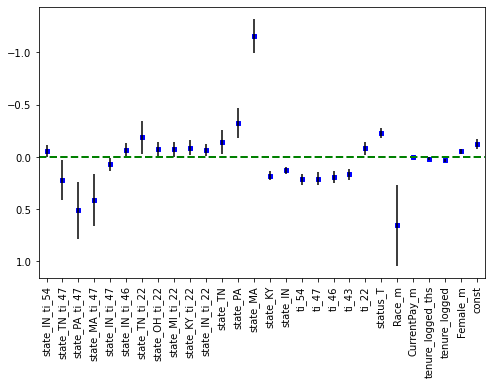

In [98]:
fig, ax = plt.subplots(figsize=(8, 5))
model_df.plot(y='coeff', x='varname', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(model_df.shape[0]), 
           marker='s', s=10, 
           y=model_df['coeff'], color='blue')
ax.axhline(y=0, linestyle='--', color='green', linewidth=2)
ax.invert_xaxis()
ax.invert_yaxis()

